# <p style="text-align: center;"> Práctica Final 
## <p style="text-align: center;"> Módulo Machine Learning 101

 

### Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos disponibles.

-------------------------------------------------------------------------

## <span style="color: purple; font-weight: bold;"> Importar librerías </span>


In [5]:
#Para calculos avanzados
import pandas as pd
#Para analisis de datos
import numpy as np
#Para crear gráficas
import matplotlib.pyplot as plt
#para gráficos estadisticos
import seaborn as sns
#Para gestionar nulos
from sklearn.impute import SimpleImputer
#PAra dividir en train/test
from sklearn.model_selection import train_test_split
#Para suprimir advertencias
import warnings
warnings.filterwarnings('ignore')
#Preparacion y transformacion de datos
from sklearn import preprocessing
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.linear_model import Lasso, Ridge,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [6]:
#Importar CSV
data = pd.read_csv("./airbnb-listings-extract.csv", encoding='utf8', sep=';',decimal=',')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.5,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


### <span style="color: purple; font-weight: bold;">  Revisar limpiar la información del dataset </span>

<span style="color: green;">  A continuación se presenta el tipo de dato que se tiene por columna y los valores no nulos que hay </span>


In [8]:
data.shape

(14780, 89)

In [9]:
#Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

<span style="color: green;">   En el código anterior se revisan la cantidad de VALORES NO NULOS que tiene el dataset por columna, las filas que hay en total </span>
<span style="color: green;">   y también quiero saber la cantidad de valores que SI SON NULOS por columna. </span>


In [11]:
#ver vacíos
pd.set_option('display.max_rows', None)
print(data.isna().sum())

ID                                    0
Listing Url                           0
Scrape ID                             0
Last Scraped                          0
Name                                  1
Summary                             591
Space                              3892
Description                           6
Experiences Offered                   0
Neighborhood Overview              5646
Notes                              9136
Transit                            5714
Access                             6462
Interaction                        6554
House Rules                        5161
Thumbnail Url                      2820
Medium Url                         2820
Picture Url                          19
XL Picture Url                     2820
Host ID                               0
Host URL                              0
Host Name                             3
Host Since                            3
Host Location                        43
Host About                         5241


### Filtrar por Madrid, sólo se quiere la información de esa ciudad
##### Pero se tiene información de Madrid de diferentes formas, así que ha limpiar los datos.
##### Primero adiós a columnas que no voy a utilizar para la práctica

In [13]:
#borrar columnas
#Seleccionar las columnas a borrar
erase_columns= ['ID', 'Host Since', 'Host Location', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url' , 'Host Neighbourhood', 'Host Listings Count', 'Host Verifications', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'Country', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Jurisdiction Names', 'Features']

#elimnar columnas
madrid_airbnb = data.drop(erase_columns, axis=1)

#### Se solicita la descripción de Madrid, en el dataset se hace referencia a la ciudad de diferentes maneras.

Para obtener esa información filtré por País y después estuve revisando la información de las columnas donde se hace referencia a la ciudad.

** Como la columna de Country Code no tenía nulos y se encontraba el código de España, filtré por ES

In [15]:
#Para ver los valores unicos de la columna Country Code
unique_country_codes = madrid_airbnb['Country Code'].unique()
unique_country_codes

array(['US', 'ES', 'NL', 'BE', 'FR', 'It', 'GB', 'IE', 'IT', 'GR', 'DK',
       'AU', 'DE', 'AT', 'CA', 'CH', 'HK', 'CU'], dtype=object)

In [16]:
#muestra de la columna Country Code las filas que tengan la palabra ES
spain_row = madrid_airbnb[madrid_airbnb['Country Code'].str.contains('ES', case=False, na=False)]
spain_row.head(5)

,Host Response Rate,Host Total Listings Count,Street,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
1,100.0,162.0,"Barcelona, Barcelona 08010, Spain",la Dreta de l'Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain",ES,...,8.0,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017"
2,100.0,162.0,"Barcelona, Barcelona 08008, Spain",la Dreta de l'Eixample,Barcelona,Barcelona,08008,Barcelona,"Barcelona, Spain",ES,...,NaN,NaN,NaN,NaN,NaN,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868"
3,100.0,27.0,"Barcelona, Barcelona 08009, Spain",la Dreta de l'Eixample,Barcelona,Barcelona,08009,Barcelona,"Barcelona, Spain",ES,...,10.0,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09,"41.3969668101,2.1674178103"
4,99.0,207.0,"L'Antiga Esquerra de l'Eixample, Barcelona, Ca...",l'Antiga Esquerra de l'Eixample,Barcelona,Catalunya,08036,Barcelona,"Barcelona, Spain",ES,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616"
5,99.0,207.0,"La Nova Esquerra de l'Eixample, Barcelona, Cat...",la Nova Esquerra de l'Eixample,Barcelona,Catalunya,08015,Barcelona,"Barcelona, Spain",ES,...,NaN,NaN,NaN,NaN,NaN,NaN,strict,92.0,NaN,"41.3825366724,2.14957707323"


Al tener solamente España, me di cuenta que existen varias columnas mencionando Madrid de distintas formas, y como la columna City es la que menos nulos presenta decidí tomar esa columna para poderla filtrar.

In [18]:
#Para ver los valores unicos de la columna Market
unique_city_codes = spain_row['Market'].unique()
unique_city_codes

array(['Barcelona', 'Mallorca Island', 'Madrid', nan,
       'Other (International)', 'London', 'Toledo', 'Deauville'],
      dtype=object)

In [19]:
#Revisar la información de Market, tiene una fila que pertenece a Madrid vamos a cambiarla
spain_row[spain_row['Market'] == 'Other (International)'].head(5)

,Host Response Rate,Host Total Listings Count,Street,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
325,100.0,1.0,"Andratx, Balearic Islands 07150, Spain",Andratx,Andratx,Balearic Islands,07150,Other (International),"Andratx, Spain",ES,...,10.0,10.0,10.0,10.0,10.0,9.0,moderate,1.0,0.35,"39.5482575328,2.37339745606"
1895,100.0,1.0,"Port d'Andratx, Illes Balears 07157, Spain",Andratx,Port d'Andratx,Illes Balears,07157,Other (International),"Port d'Andratx, Spain",ES,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"39.5430990367,2.3874528607"
2377,100.0,1.0,"Embajadores, Madrid, Comunidad de Madrid 28012...",Embajadores,Madrid,Comunidad de Madrid,28012,Other (International),"Madrid, Spain",ES,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.07,"40.4123667046,-3.70266136204"
4056,100.0,1.0,"La Latina, Madrid, Comunidad de Madrid 28005, ...",Embajadores,Madrid,Comunidad de Madrid,28005,Other (International),"Madrid, Spain",ES,...,10.0,9.0,10.0,10.0,10.0,9.0,moderate,1.0,4.19,"40.4093480105,-3.70893177992"
4436,NaN,1.0,"La Latina, Madrid, Comunidad de Madrid 28005, ...",Palacio,Madrid,Comunidad de Madrid,28005,Other (International),"Madrid, Spain",ES,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,1.61,"40.4095357948,-3.71352898079"


In [20]:
#Cambiar en columna Market las filas que dicen Madrid de la columna City
spain_row.loc[spain_row['City'].str.contains('Madrid', case=False, na=False), 'Market'] = 'Madrid'


In [21]:
#Para verificar los valores unicos de la columna Market
unique_city_codes = spain_row['Market'].unique()
unique_city_codes

array(['Barcelona', 'Mallorca Island', 'Madrid', 'Other (International)'],
      dtype=object)

In [22]:
#muestra el dataframe con los elementos que dicen Madrid
df_madrid = spain_row[spain_row['Market'].str.contains('Madrid', case=False, na=False)]
df_madrid.head(5)

,Host Response Rate,Host Total Listings Count,Street,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
40,84.0,3.0,"Madrid, Comunidad de Madrid 28007, Spain",Niño Jesús,Madrid,Comunidad de Madrid,28007,Madrid,"Madrid, Spain",ES,...,9.0,9.0,9.0,9.0,9.0,9.0,flexible,3.0,7.71,"40.4069528479,-3.6708944906"
41,100.0,1.0,"Recoletos, Madrid, Comunidad de Madrid 28001, ...",Recoletos,Madrid,Comunidad de Madrid,28001,Madrid,"Madrid, Spain",ES,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,2.03,"40.4259039216,-3.6816474596"
42,100.0,2.0,"Recoletos, Madrid, Comunidad de Madrid 28001, ...",Recoletos,Madrid,Comunidad de Madrid,28001,Madrid,"Madrid, Spain",ES,...,9.0,9.0,10.0,10.0,10.0,9.0,flexible,1.0,3.28,"40.4283518893,-3.68715466311"
43,100.0,8.0,"Recoletos, Madrid, Comunidad de Madrid 28001, ...",Recoletos,Madrid,Comunidad de Madrid,28001,Madrid,"Madrid, Spain",ES,...,10.0,9.0,10.0,10.0,10.0,9.0,strict,7.0,0.57,"40.4274544347,-3.68576302323"
44,100.0,2.0,"Recoletos, Madrid, Comunidad de Madrid 28001, ...",Recoletos,Madrid,Comunidad de Madrid,28001,Madrid,"Madrid, Spain",ES,...,NaN,NaN,NaN,NaN,NaN,NaN,moderate,2.0,NaN,"40.4286708577,-3.68542275712"


In [23]:
#Para verificar los valores unicos de la columna Market
unique_city_codes2 = df_madrid['Market'].unique()
unique_city_codes2

array(['Madrid'], dtype=object)

### Revisar la información de los datos

ya que tengo market con los datos de Madrid voy a revisar que otras columnas puedo eliminar

In [26]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13334 entries, 40 to 14757
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Response Rate              11622 non-null  float64
 1   Host Total Listings Count       13331 non-null  float64
 2   Street                          13334 non-null  object 
 3   Neighbourhood Cleansed          13334 non-null  object 
 4   City                            13328 non-null  object 
 5   State                           13287 non-null  object 
 6   Zipcode                         12890 non-null  object 
 7   Market                          13334 non-null  object 
 8   Smart Location                  13334 non-null  object 
 9   Country Code                    13334 non-null  object 
 10  Latitude                        13334 non-null  object 
 11  Longitude                       13334 non-null  object 
 12  Property Type                   1333

In [27]:
#borrar columnas innecesarias
#Seleccionar las columnas a borrar
erase_columns2= ['City', 'State', 'Smart Location', 'Country Code', 'Amenities','Geolocation']
#elimnar columnas
df_airbnb = df_madrid.drop(erase_columns2, axis=1)

Revisar los datos excluyendo las columnas que tengas datos de tipo object

In [29]:
pd.options.display.float_format = '{:,.2f}'.format
df_airbnb.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Host Response Rate,"11,622.00",NaN,NaN,NaN,94.79,15.34,0.00,100.00,100.00,100.00,100.00
Host Total Listings Count,"13,331.00",NaN,NaN,NaN,9.74,27.46,0.00,1.00,2.00,5.00,265.00
Street,13334,747,"Embajadores, Madrid, Comunidad de Madrid 28012...",590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighbourhood Cleansed,13334,127,Embajadores,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zipcode,12890,88,28012,2065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Market,13334,1,Madrid,13334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,13334,13334,40.406952847921026,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longitude,13334,13334,-3.6708944905973238,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Type,13334,22,Apartment,10973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Room Type,13334,3,Entire home/apt,7934,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
pd.options.display.float_format = '{:,.2f}'.format
df_airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,"11,622.00",94.79,15.34,0.00,100.00,100.00,100.00,100.00
Host Total Listings Count,"13,331.00",9.74,27.46,0.00,1.00,2.00,5.00,265.00
Accommodates,"13,334.00",3.18,1.99,1.00,2.00,2.00,4.00,16.00
Bedrooms,"13,311.00",1.29,0.82,0.00,1.00,1.00,2.00,10.00
Beds,"13,285.00",1.98,1.51,1.00,1.00,1.00,2.00,16.00
Square Feet,522.00,375.84,545.97,0.00,0.00,104.00,646.00,"5,167.00"
Price,"13,325.00",67.49,61.84,9.00,31.00,52.00,80.00,875.00
Weekly Price,"3,366.00",368.57,191.33,70.00,200.00,350.00,490.00,999.00
Monthly Price,"3,324.00","1,346.54",984.89,250.00,700.00,"1,200.00","1,680.00","25,000.00"
Security Deposit,"5,652.00",183.40,108.96,70.00,100.00,150.00,200.00,990.00


In [31]:
#Ver cuantos nulos hay por columna
df_airbnb.isnull().sum()

Host Response Rate                 1712
Host Total Listings Count             3
Street                                0
Neighbourhood Cleansed                0
Zipcode                             444
Market                                0
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                            50
Bedrooms                             23
Beds                                 49
Bed Type                              0
Square Feet                       12812
Price                                 9
Weekly Price                       9968
Monthly Price                     10010
Security Deposit                   7682
Cleaning Fee                       5484
Guests Included                       0
Extra People                          0
Minimum Nights                        0
Maximum Nights                        0


Al observar la información del dataset bathrooms es de tipo object, puede ser una variable que afecte al precio de un airbnb, hay que convertirlo a float, primero voy a ver que tipo de datos tiene ya vi que tiene 50 vacíos

<span style="color: green; font-weight: bold;">Reemplacé los nulos por NA y los convertí a valor númerico, al igual que las columnas de Latitude, Longitude y reviews per month</span>


In [34]:
df_airbnb['Bathrooms'] = df_airbnb['Bathrooms'].replace('nan', pd.NA)
df_airbnb['Bathrooms'] = df_airbnb['Bathrooms'].astype('float64')

In [35]:
df_airbnb['Longitude'] = df_airbnb['Longitude'].astype('float64')
df_airbnb['Latitude'] = df_airbnb['Latitude'].astype('float64')
df_airbnb['Reviews per Month'] = df_airbnb['Reviews per Month'].astype('float64')

Ahora ya tengo los valores que estaban como tipo object para poderlo considerar en el análisis

In [37]:
pd.options.display.float_format = '{:,.2f}'.format

df_airbnb.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Host Response Rate,"11,622.00",NaN,NaN,NaN,94.79,15.34,0.00,100.00,100.00,100.00,100.00
Host Total Listings Count,"13,331.00",NaN,NaN,NaN,9.74,27.46,0.00,1.00,2.00,5.00,265.00
Street,13334,747,"Embajadores, Madrid, Comunidad de Madrid 28012...",590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighbourhood Cleansed,13334,127,Embajadores,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zipcode,12890,88,28012,2065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Market,13334,1,Madrid,13334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,"13,334.00",NaN,NaN,NaN,40.42,0.02,39.69,40.41,40.42,40.43,40.56
Longitude,"13,334.00",NaN,NaN,NaN,-3.70,0.06,-3.86,-3.71,-3.70,-3.69,2.78
Property Type,13334,22,Apartment,10973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Room Type,13334,3,Entire home/apt,7934,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <span style="color: purple; font-weight: bold;"> Preprocesamiento de valores nulos </span>

<span style="color: green; font-weight: bold;"> Voy a revisar la cantidad de nulos para ver, cuales me combiene quitar o llenar con otros datos
 </span>


In [40]:
# Obtener la cantidad total de valores por columna
total_values = df_airbnb.shape[0]

# Calcula la cantidad de valores nulos por columna
missing_values = df_airbnb.isnull().sum()

# Calcula el porcentaje de valores nulos por columna
missing_percentages = (missing_values / total_values) * 100

# Redondea el porcentaje de valores nulos a dos decimales
missing_percentages_rounded = missing_percentages.round(2)

# Obtiene el tipo de dato de cada columna
data_type = df_airbnb.dtypes

# Tabular los resultados
missing_data_summary = pd.DataFrame({
    'Total valores': total_values,
    'Total nulos': missing_values,
    '% nulos': missing_percentages_rounded,
    'Tipo': data_type
})

print(missing_data_summary)

                                Total valores  Total nulos  % nulos     Tipo
Host Response Rate                      13334         1712    12.84  float64
Host Total Listings Count               13334            3     0.02  float64
Street                                  13334            0     0.00   object
Neighbourhood Cleansed                  13334            0     0.00   object
Zipcode                                 13334          444     3.33   object
Market                                  13334            0     0.00   object
Latitude                                13334            0     0.00  float64
Longitude                               13334            0     0.00  float64
Property Type                           13334            0     0.00   object
Room Type                               13334            0     0.00   object
Accommodates                            13334            0     0.00    int64
Bathrooms                               13334           50     0.37  float64

<span style="color: green;"> De acuerdo a la tabla voy a:</span>

<span style="color: green;">
** Eliminar la columna con alto porcentaje de nulos Square Feet </span>
   


In [42]:
#Seleccionar la columna a borrar
erase_columns3= ['Square Feet']
#elimnar columnas
df_airbnb1 = df_airbnb.drop(erase_columns3, axis=1)

<span style="color: orange;"> Voy a dar otro vistazo a los datos para retirar nulos y outliers y probablemente elimine más columnas, voy a revisar weekly y monthly price que tienen una cantidad por encima del 70% de nulos</span>

Text(0.5, 1.0, 'Monthly Price')

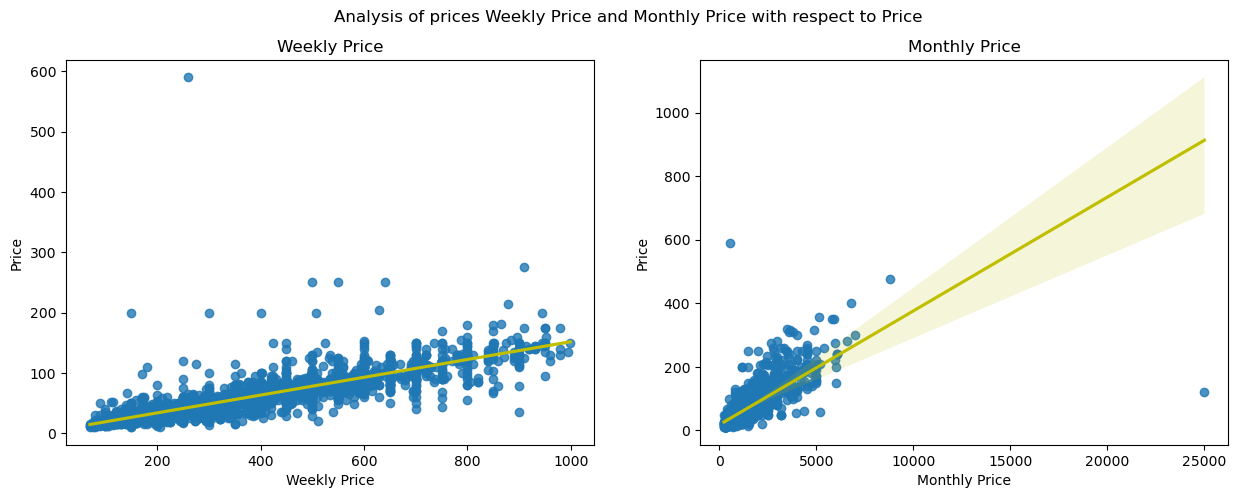

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Analysis of prices Weekly Price and Monthly Price with respect to Price')
sns.regplot(ax=axes[0], data=df_airbnb1, x='Weekly Price', y='Price', line_kws=dict(color="y"))
axes[0].set_title('Weekly Price')
sns.regplot(ax=axes[1], data=df_airbnb1, x='Monthly Price', y='Price', line_kws=dict(color="y"))
axes[1].set_title('Monthly Price')

<span style="color: orange;"> Se tienen datos poco lejos de la correlación pero se confirma que entre más tiempo aumenta el costo, esa tendencia se mejor en weekly price, así que a eliminarla también </span>

<span style="color: green;">
** Revisar security deposit y cleaning fee debido al % de nulos </span>

Text(0.5, 1.0, 'Cleaning Fee')

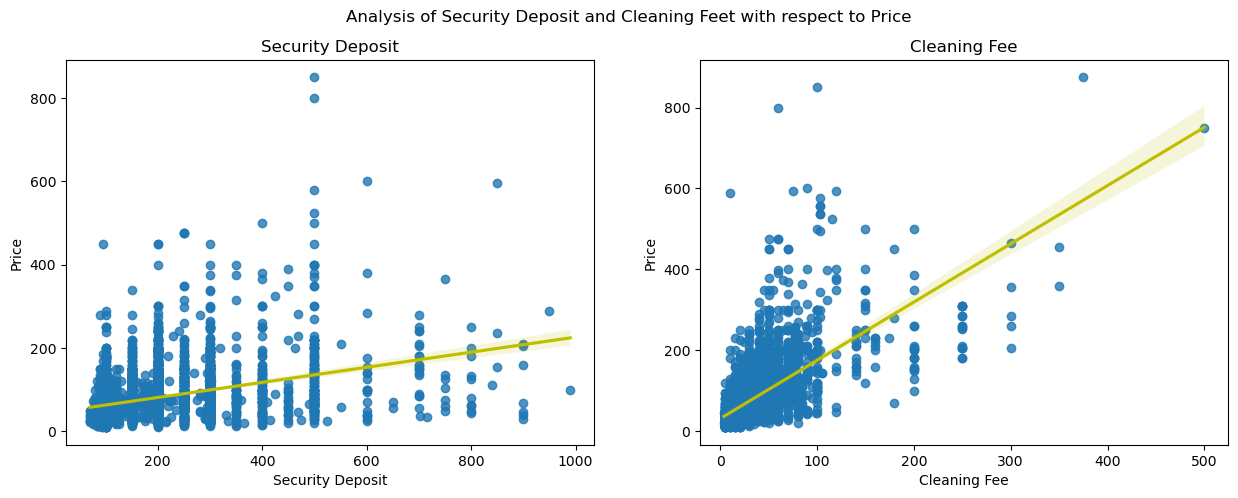

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Analysis of Security Deposit and Cleaning Feet with respect to Price')
sns.regplot(ax=axes[0], data=df_airbnb1, x='Security Deposit', y='Price', line_kws=dict(color="y"))
axes[0].set_title('Security Deposit')
sns.regplot(ax=axes[1], data=df_airbnb1, x='Cleaning Fee', y='Price', line_kws=dict(color="y"))
axes[1].set_title('Cleaning Fee')



<span style="color: orange;"> En el histograma de security deposit no se observa una tendencia los precios se encuentran a lo largo del eje x mientras que en el histograma se ve que hay relación al ir en aumento el eje y como aumenta el eje x, borraré security deposit y cleaning fee la dejaré los valores mulos los voy a pasar a cero, mi lógica es que el dueño no pide esa cantidad al ya tenerla en el precio</span>

<span style="color: green;">
** Eliminar columnas </span>

<span style="color: orange;"> De acuerdo a la información de arriba las demás columnas tienen un porcentaje de alrededor 20% de nulos, voy a rellenar esos espacios que tienen </span>

In [50]:
#Seleccionar las columnas a borrar
erase_columns3= ['Weekly Price','Monthly Price', 'Security Deposit','Zipcode','Latitude','Longitude']
#elimnar columnas
df_airbnb1 = df_airbnb1.drop(erase_columns3, axis=1)

In [51]:
df_airbnb1.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,"11,622.00",94.79,15.34,0.00,100.00,100.00,100.00,100.00
Host Total Listings Count,"13,331.00",9.74,27.46,0.00,1.00,2.00,5.00,265.00
Accommodates,"13,334.00",3.18,1.99,1.00,2.00,2.00,4.00,16.00
Bathrooms,"13,284.00",1.25,0.60,0.00,1.00,1.00,1.00,8.00
Bedrooms,"13,311.00",1.29,0.82,0.00,1.00,1.00,2.00,10.00
Beds,"13,285.00",1.98,1.51,1.00,1.00,1.00,2.00,16.00
Price,"13,325.00",67.49,61.84,9.00,31.00,52.00,80.00,875.00
Cleaning Fee,"7,850.00",29.59,25.91,4.00,15.00,25.00,35.00,500.00
Guests Included,"13,334.00",1.57,1.09,1.00,1.00,1.00,2.00,16.00
Extra People,"13,334.00",7.38,10.77,0.00,0.00,0.00,14.00,276.00


<span style="color: green;"> Histogramas de distribución de los datos </span>


<span style="color: orange;"> Se observa gran cantidad de outliers al tener los datois hacia alguno de los lados de las gráficas, 
además hay otras en donde se observa que los datos están dispersos en todo el ancho de la gráfica teniendo la concentración mayor de datos 
a los costados </span>


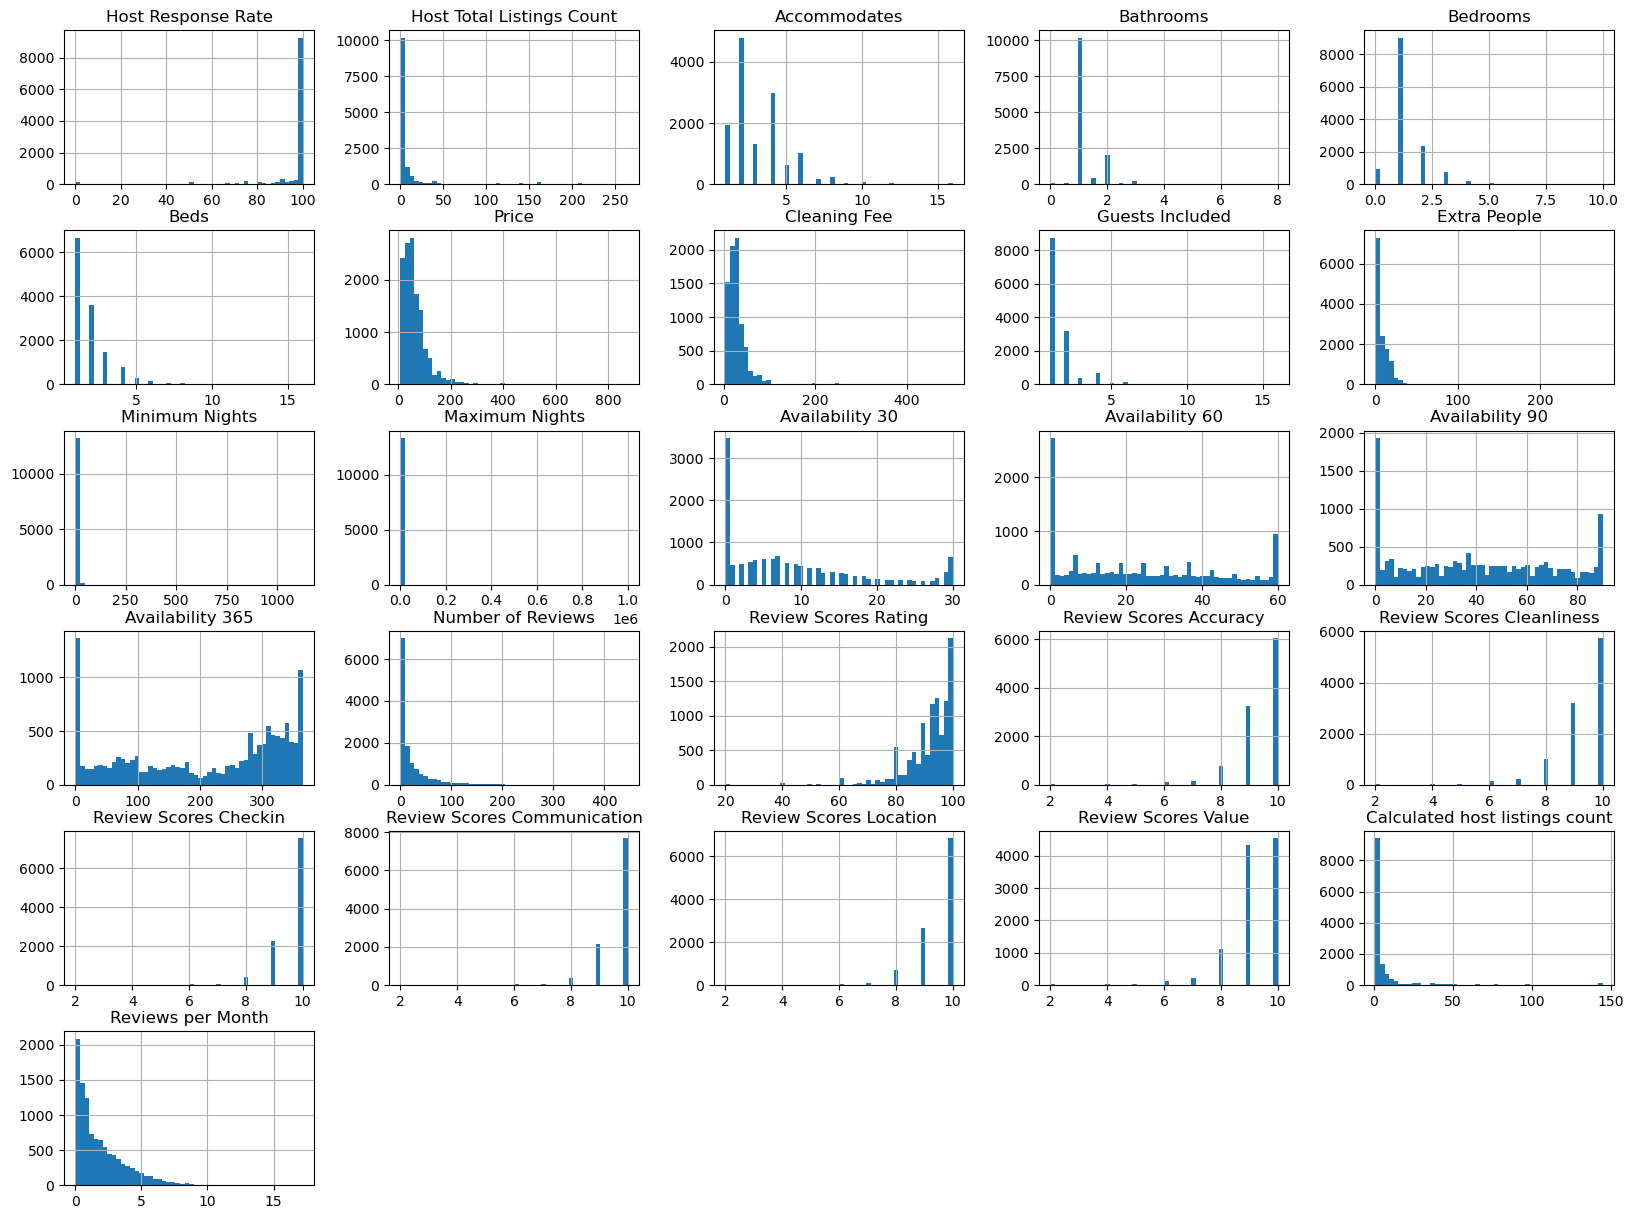

In [54]:
df_airbnb1.hist(bins=50,figsize=(20,15))
plt.show()

<span style="color: orange;"> Otra forma de revisar outliers es usando boxplot en la columna de Price se observa por encima del rango intercuantil</span>

Text(0.5, 0, 'Total Price per Airbnb')

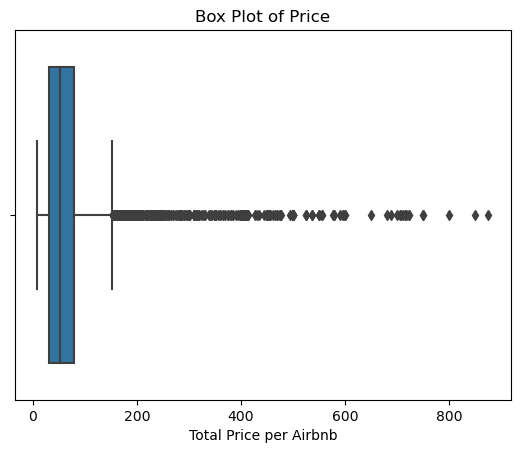

In [56]:
# Create a box plot
price_bx = sns.boxplot(data = df_airbnb1, x = 'Price')

# Add a title and change xlabel
price_bx.set_title('Box Plot of Price')
price_bx.set_xlabel('Total Price per Airbnb')

<span style="color: orange;"> Hay muchas irregularidades en la dispersión de los datos, si revisamos los datos nulos y los histogramas vemos que las columnas bathrooms, bedrooms,beds tienen un porcentaje muy bajo de nulos se puede rellenar sin problemas pero revisaré que tan alejados están los datos mínimos y máximos</span>

<span style="color: green;"> Ver datos de las columnas con menos valores nulos </span>

In [59]:
df_airbnb1['Bathrooms'].value_counts(ascending=True)

Bathrooms
6.50        1
7.00        1
8.00        3
5.50        4
3.50       15
6.00       21
4.50       23
4.00       36
5.00       42
0.50       62
0.00       65
2.50       94
3.00      239
1.50      464
2.00     2039
1.00    10175
Name: count, dtype: int64

<span style="color: green;"> tiene poco nulos porque tiene valores como ceros, es ilógico que no se tengan baños en un airbnb, puede ser que sea baño compartido, un baño para todos debido a que son cuartos privados, este lo dejaré con la media  </span>

In [61]:
df_airbnb1['Bedrooms'].value_counts(ascending=True)

Bedrooms
8.00        5
10.00       6
7.00        6
6.00       16
5.00       53
4.00      198
3.00      739
0.00      925
2.00     2343
1.00     9020
Name: count, dtype: int64

<span style="color: green;"> El número de habitaciones va disminuyendo de acuerdo aumenta su cantidad entre más habitaciones menor es la frecuencia  </span>

In [63]:
df_airbnb1['Beds'].value_counts(ascending=True)

Beds
15.00       2
13.00       3
11.00       5
14.00       5
12.00       9
16.00      14
9.00       29
10.00      39
8.00       63
7.00       67
6.00      177
5.00      313
4.00      808
3.00     1484
2.00     3603
1.00     6664
Name: count, dtype: int64

<span style="color: green;"> Son pocos los airbnb que ofrecen una cantidad mayor a 14 </span>

<span style="color: green;"> Antes de cambiar los datos cambiar cleaning fee por ceros  </span>

In [65]:
# Llenar los valores nulos en la columna 'cleaning_fee' con ceros
df_airbnb1['Cleaning Fee'].fillna(0, inplace=True)

<span style="color: orange;"> Ahora si a quitar nulos con la moda </span>


## <span style="color: purple; font-weight: bold;"> Imputar valores nulos numéricos con la media </span>


In [68]:
imputer = SimpleImputer(strategy='mean')
df_airbnb1[df_airbnb1.select_dtypes(include=['float64', 'int64']).columns] = imputer.fit_transform(df_airbnb1.select_dtypes(include=['float64', 'int64']))

<span style="color: green;"> Vamos a revisar de nuevo los valores numericos </span>

In [70]:
pd.options.display.float_format = '{:,.2f}'.format
df_airbnb1.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,"13,334.00",94.79,14.32,0.00,94.79,100.00,100.00,100.00
Host Total Listings Count,"13,334.00",9.74,27.46,0.00,1.00,2.00,5.00,265.00
Accommodates,"13,334.00",3.18,1.99,1.00,2.00,2.00,4.00,16.00
Bathrooms,"13,334.00",1.25,0.60,0.00,1.00,1.00,1.00,8.00
Bedrooms,"13,334.00",1.29,0.82,0.00,1.00,1.00,2.00,10.00
Beds,"13,334.00",1.98,1.51,1.00,1.00,1.98,2.00,16.00
Price,"13,334.00",67.49,61.82,9.00,31.00,53.00,80.00,875.00
Cleaning Fee,"13,334.00",17.42,24.64,0.00,0.00,10.00,30.00,500.00
Guests Included,"13,334.00",1.57,1.09,1.00,1.00,1.00,2.00,16.00
Extra People,"13,334.00",7.38,10.77,0.00,0.00,0.00,14.00,276.00


<span style="color: green;"> Vamos a revisar de nuevo los valores </span>

In [72]:
# Obtener la cantidad total de valores por columna
total_values = df_airbnb1.shape[0]

# Calcula la cantidad de valores nulos por columna
missing_values = df_airbnb1.isnull().sum()

# Calcula el porcentaje de valores nulos por columna
missing_percentages = (missing_values / total_values) * 100

# Redondea el porcentaje de valores nulos a dos decimales
missing_percentages_rounded = missing_percentages.round(2)

# Obtiene el tipo de dato de cada columna
data_type = df_airbnb1.dtypes

# Tabular los resultados
missing_data_summary = pd.DataFrame({
    'Total valores': total_values,
    'Total nulos': missing_values,
    '% nulos': missing_percentages_rounded,
    'Tipo': data_type
})

print(missing_data_summary)

                                Total valores  Total nulos  % nulos     Tipo
Host Response Rate                      13334            0     0.00  float64
Host Total Listings Count               13334            0     0.00  float64
Street                                  13334            0     0.00   object
Neighbourhood Cleansed                  13334            0     0.00   object
Market                                  13334            0     0.00   object
Property Type                           13334            0     0.00   object
Room Type                               13334            0     0.00   object
Accommodates                            13334            0     0.00  float64
Bathrooms                               13334            0     0.00  float64
Bedrooms                                13334            0     0.00  float64
Beds                                    13334            0     0.00  float64
Bed Type                                13334            0     0.00   object

<span style="color: orange;"> Quiero revisar si puedo eliminar más columnas, por ejemplos las de availability en los histogramas no se observaba alguna campana </span>


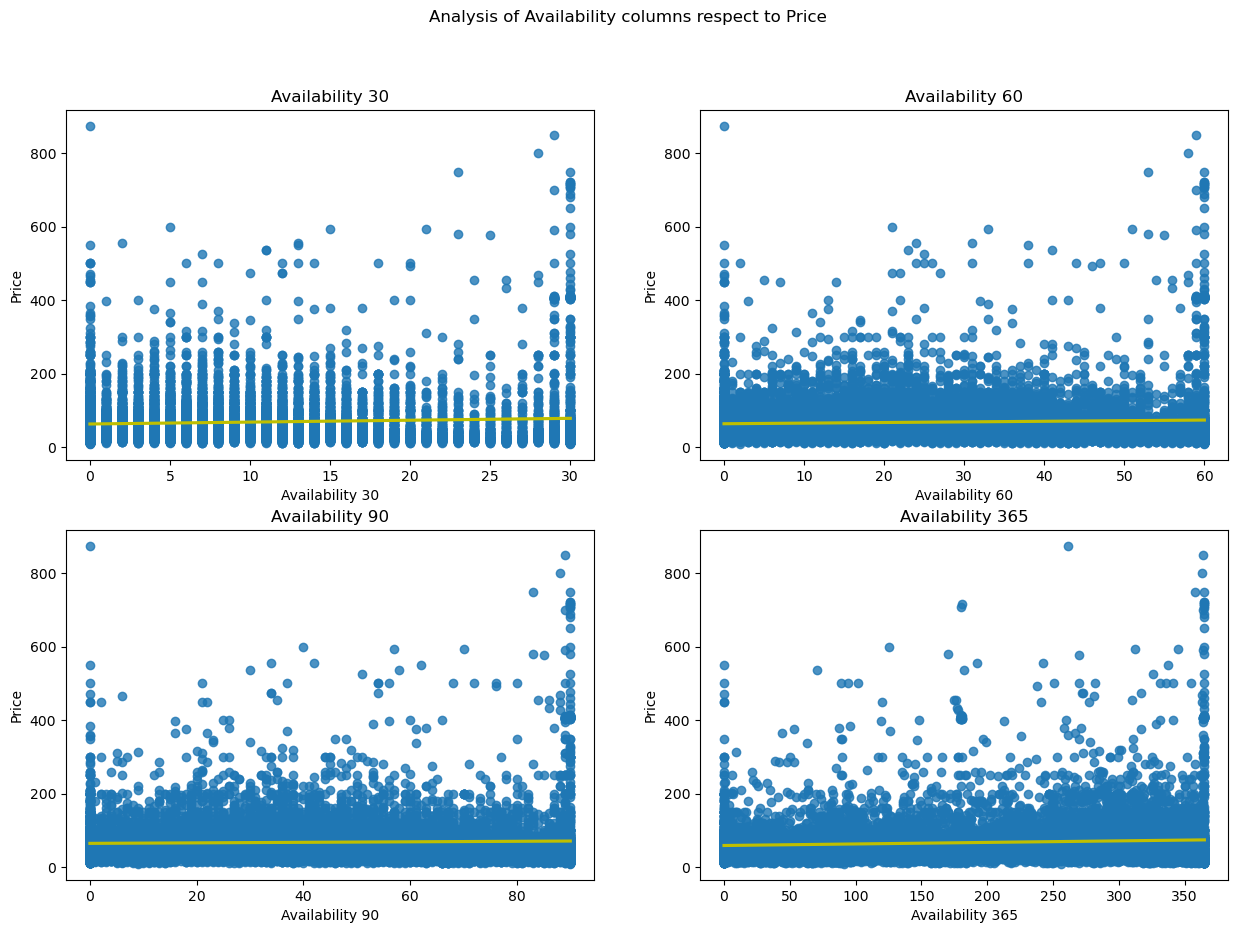

In [74]:
#Dispersión de las columnas Availability
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  
fig.suptitle('Analysis of Availability columns respect to Price')

sns.regplot(ax=axes[0, 0], data=df_airbnb1, x='Availability 30', y='Price', line_kws=dict(color="y"))
axes[0, 0].set_title('Availability 30')

sns.regplot(ax=axes[0, 1], data=df_airbnb1, x='Availability 60', y='Price', line_kws=dict(color="y"))
axes[0, 1].set_title('Availability 60')

sns.regplot(ax=axes[1, 0], data=df_airbnb1, x='Availability 90', y='Price', line_kws=dict(color="y"))
axes[1, 0].set_title('Availability 90')

sns.regplot(ax=axes[1, 1], data=df_airbnb1, x='Availability 365', y='Price', line_kws=dict(color="y"))
axes[1, 1].set_title('Availability 365')

plt.show()


<span style="color: orange;"> No se ve relación si x (disponibilidad) aumenta no se ve un aumento en y (precio) </span>

In [76]:
#Seleccionar las columnas a borrar
erase_columns4= ['Availability 30','Availability 60','Availability 90','Availability 365']
#elimnar columnas
df_airbnb1 = df_airbnb1.drop(erase_columns4, axis=1)

In [77]:
df_airbnb1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13334 entries, 40 to 14757
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Response Rate              13334 non-null  float64
 1   Host Total Listings Count       13334 non-null  float64
 2   Street                          13334 non-null  object 
 3   Neighbourhood Cleansed          13334 non-null  object 
 4   Market                          13334 non-null  object 
 5   Property Type                   13334 non-null  object 
 6   Room Type                       13334 non-null  object 
 7   Accommodates                    13334 non-null  float64
 8   Bathrooms                       13334 non-null  float64
 9   Bedrooms                        13334 non-null  float64
 10  Beds                            13334 non-null  float64
 11  Bed Type                        13334 non-null  object 
 12  Price                           1333

## <span style="color: purple; font-weight: bold;"> División Train/Test </span>

<span style="color: orange;">  </span>

In [80]:
df_airbnb1.to_csv('./df_airbnb1.csv', sep=';', decimal='.', index=False)

In [81]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_airbnb1, test_size=0.2, shuffle=True, random_state=23)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df_train = pd.read_csv('./train.csv', sep=';', decimal='.')
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (10667, 29)
Dimensiones del dataset de test: (2667, 29)


## <span style="color: purple; font-weight: bold;"> Análisis Exploratorio de Datos </span>

In [83]:
df_train.head(5).T

,0,1,2,3,4
Host Response Rate,100.00,100.00,100.00,100.00,80.00
Host Total Listings Count,2.00,5.00,3.00,1.00,1.00
Street,"Malasaña, Madrid, Comunidad de Madrid 28004, S...","Aluche, Madrid, Comunidad de Madrid 28011, Spain","Madrid, Comunidad de Madrid 28005, Spain","Malasaña, Madrid, Comunidad de Madrid 28015, S...","Madrid, Comunidad de Madrid 28014, Spain"
Neighbourhood Cleansed,Universidad,Puerta del Angel,Palacio,Universidad,Cortes
Market,Madrid,Madrid,Madrid,Madrid,Madrid
Property Type,Bed & Breakfast,Apartment,Apartment,Apartment,Condominium
Room Type,Private room,Entire home/apt,Private room,Private room,Entire home/apt
Accommodates,2.00,8.00,2.00,2.00,8.00
Bathrooms,2.00,1.00,1.00,1.00,2.00
Bedrooms,1.00,2.00,1.00,1.00,4.00


<span style="color: orange;"> Listo la división Train/Test ahora vamos a revisar de nuevo los datos </span>

In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10667 entries, 0 to 10666
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Response Rate              10667 non-null  float64
 1   Host Total Listings Count       10667 non-null  float64
 2   Street                          10667 non-null  object 
 3   Neighbourhood Cleansed          10667 non-null  object 
 4   Market                          10667 non-null  object 
 5   Property Type                   10667 non-null  object 
 6   Room Type                       10667 non-null  object 
 7   Accommodates                    10667 non-null  float64
 8   Bathrooms                       10667 non-null  float64
 9   Bedrooms                        10667 non-null  float64
 10  Beds                            10667 non-null  float64
 11  Bed Type                        10667 non-null  object 
 12  Price                           

In [86]:
df_train.describe()

,Host Response Rate,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,"10,667.00","10,667.00","10,667.00","10,667.00","10,667.00","10,667.00","10,667.00","10,667.00","10,667.00","10,667.00",...,"10,667.00","10,667.00","10,667.00","10,667.00","10,667.00","10,667.00","10,667.00","10,667.00","10,667.00","10,667.00"
mean,94.68,9.67,3.19,1.25,1.30,1.99,67.46,17.36,1.57,7.31,...,23.00,91.62,9.41,9.32,9.62,9.64,9.54,9.21,7.52,1.93
std,14.61,27.35,1.98,0.60,0.83,1.51,61.31,24.37,1.08,10.26,...,38.43,7.97,0.83,0.89,0.71,0.67,0.68,0.85,19.46,1.69
min,0.00,0.00,1.00,0.00,0.00,1.00,9.00,0.00,1.00,0.00,...,0.00,20.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,0.02
25%,94.79,1.00,2.00,1.00,1.00,1.00,31.00,0.00,1.00,0.00,...,1.00,90.00,9.00,9.00,9.62,9.64,9.00,9.00,1.00,0.64
50%,100.00,2.00,2.00,1.00,1.00,1.98,53.00,10.00,1.00,0.00,...,7.00,91.62,9.41,9.33,10.00,10.00,10.00,9.21,2.00,1.92
75%,100.00,5.00,4.00,1.00,2.00,2.00,80.00,30.00,2.00,13.00,...,28.00,97.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00,2.34
max,100.00,265.00,16.00,8.00,10.00,16.00,850.00,500.00,16.00,276.00,...,389.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,145.00,17.21


In [87]:
df_train.isna().any()

Host Response Rate                False
Host Total Listings Count         False
Street                            False
Neighbourhood Cleansed            False
Market                            False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Price                             False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Number of Reviews                 False
Review Scores Rating              False
Review Scores Accuracy            False
Review Scores Cleanliness         False
Review Scores Checkin             False
Review Scores Communication       False
Review Scores Location            False


<span style="color: green;"> Variables Categóricas  </span>

<span style="color: orange;"> Las columnas que están cómo tipo object las voy a codificar Para saber si tienen alguna influencia en el precio </span>

In [90]:
categorical = ['Neighbourhood Cleansed', 'Market', 'Property Type','Room Type','Bed Type','Cancellation Policy','Street']

mean_map = {}
for c in categorical:
    mean = df_train.groupby(c)['Price'].mean()
    df_train[c] = df_train[c].map(mean)    
    mean_map[c] = mean

#Para test
for c in categorical:
    df_test[c] = df_test[c].map(mean_map[c])

df_train.head(5).T


,0,1,2,3,4
Host Response Rate,100.00,100.00,100.00,100.00,80.00
Host Total Listings Count,2.00,5.00,3.00,1.00,1.00
Street,66.31,37.97,61.58,66.59,75.31
Neighbourhood Cleansed,67.84,38.52,77.74,67.84,82.84
Market,67.46,67.46,67.46,67.46,67.46
Property Type,38.85,68.82,68.82,68.82,64.27
Room Type,38.51,87.21,38.51,38.51,87.21
Accommodates,2.00,8.00,2.00,2.00,8.00
Bathrooms,2.00,1.00,1.00,1.00,2.00
Bedrooms,1.00,2.00,1.00,1.00,4.00


In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10667 entries, 0 to 10666
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Response Rate              10667 non-null  float64
 1   Host Total Listings Count       10667 non-null  float64
 2   Street                          10667 non-null  float64
 3   Neighbourhood Cleansed          10667 non-null  float64
 4   Market                          10667 non-null  float64
 5   Property Type                   10667 non-null  float64
 6   Room Type                       10667 non-null  float64
 7   Accommodates                    10667 non-null  float64
 8   Bathrooms                       10667 non-null  float64
 9   Bedrooms                        10667 non-null  float64
 10  Beds                            10667 non-null  float64
 11  Bed Type                        10667 non-null  float64
 12  Price                           

## <span style="color: purple;"> Visualización de datos</span>
<span style="color: orange;"> Voy a revisar la distribución de los datos, incluyendo ahora las categóricas</span>

<span style="color: green;"> Histogramas</span>

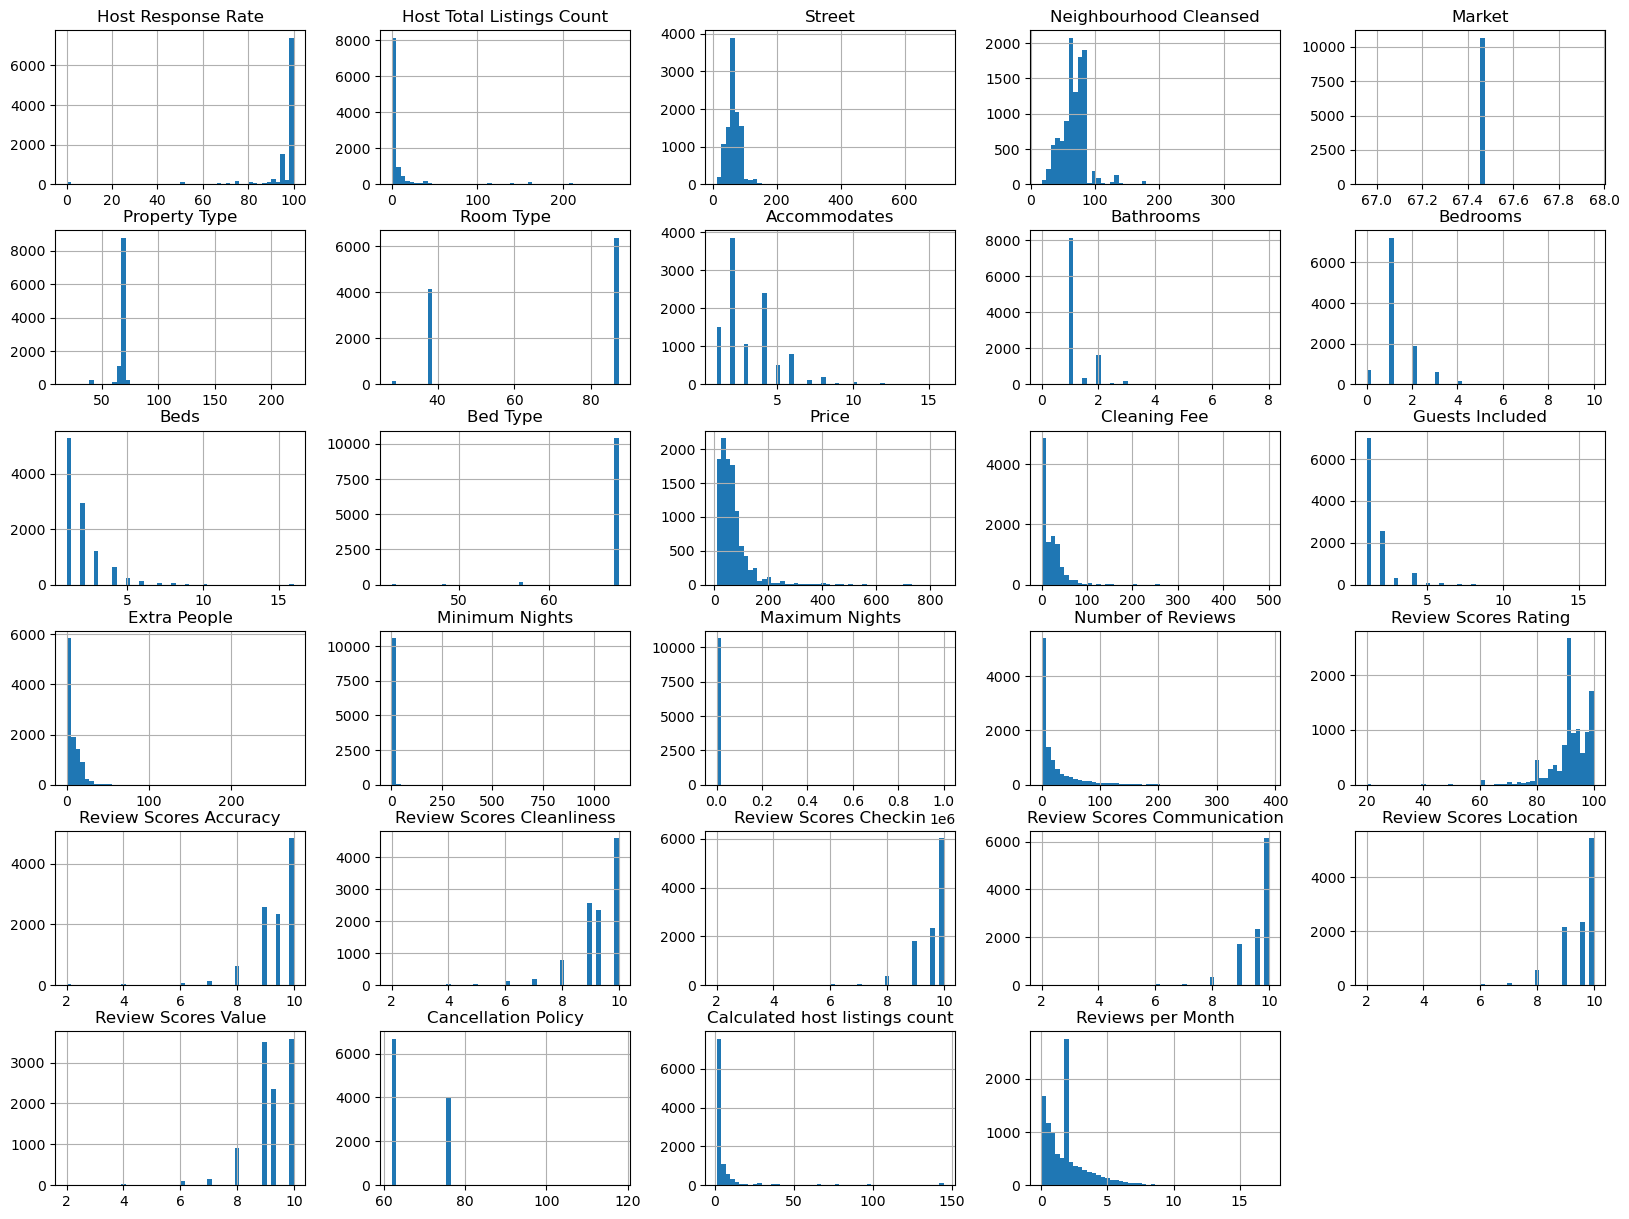

In [93]:
df_train.hist(bins=50,figsize=(20,15))
plt.show()



<span style="color: orange;"> se puede observar que hay una cantidad grande de outliers en los datos vamos a revisar la correlación y a quitar outliers</span>

<span style="color: green;"> Correlación</span>


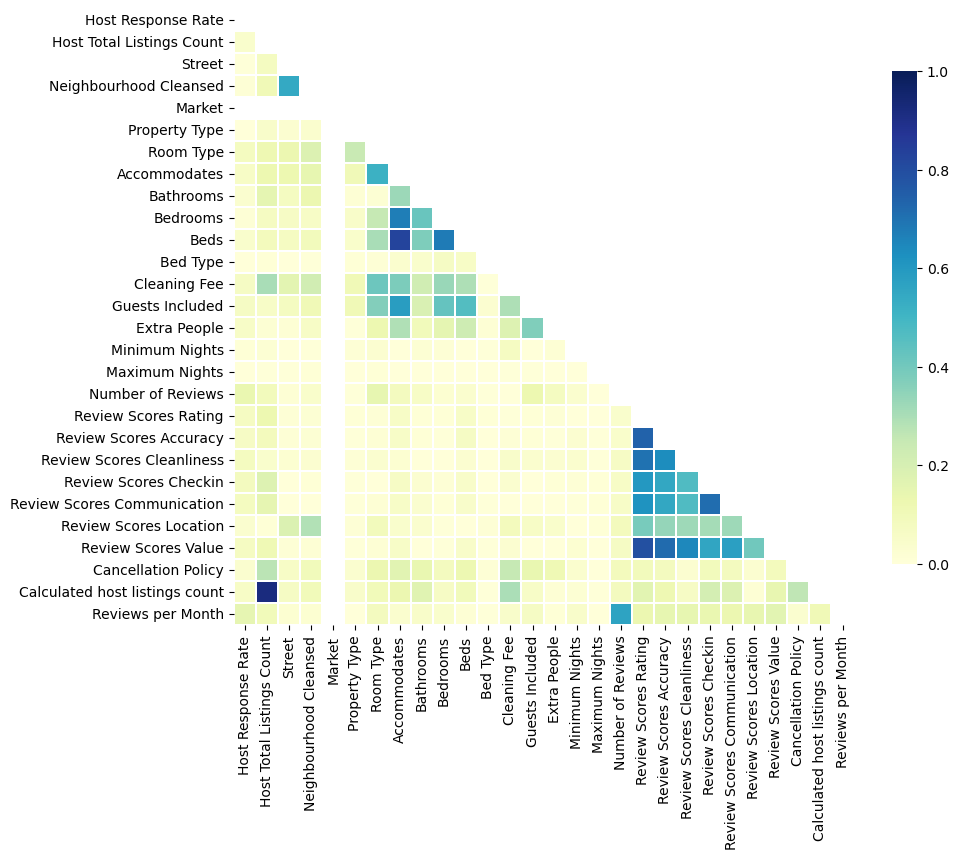

In [96]:
# Compute the correlation matrix
corr = np.abs(df_train.drop(["Price"], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

<span style="color: orange;"> Se puede observar que hay una correlación fuerte entre Bedrooms, Accommodates y , también entre las columnas de reviews, además de columnas que no tienen ninguna relación con las demás variables, voy a graficarlas y borrar las que nnno tienen relación </span>

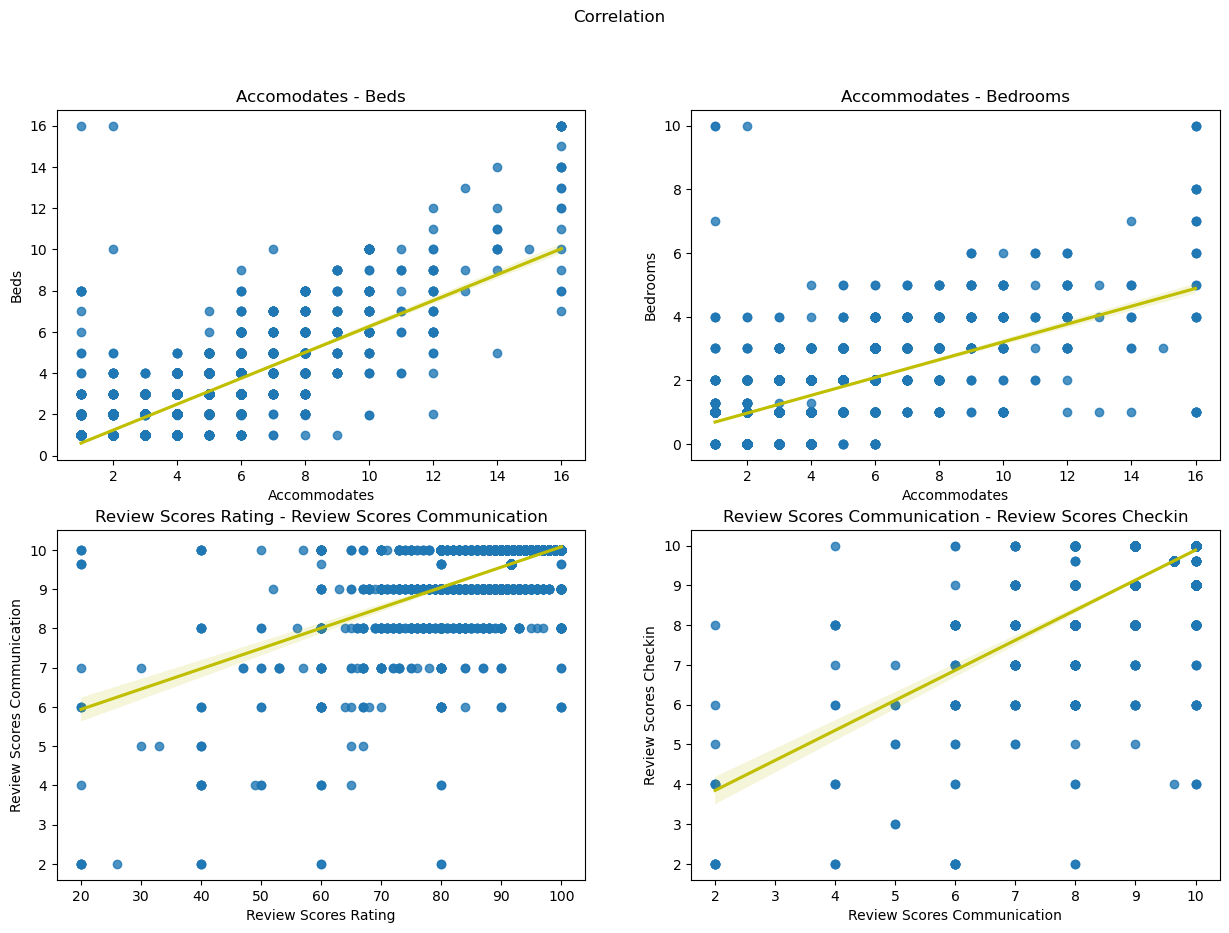

In [98]:
#Dispersión de las columnas Availability
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  
fig.suptitle('Correlation')

sns.regplot(ax=axes[0, 0], data=df_train, x='Accommodates', y='Beds', line_kws=dict(color="y"))
axes[0, 0].set_title('Accomodates - Beds')

sns.regplot(ax=axes[0, 1], data=df_train, x='Accommodates', y='Bedrooms', line_kws=dict(color="y"))
axes[0, 1].set_title('Accommodates - Bedrooms')

sns.regplot(ax=axes[1, 0], data=df_train, x='Review Scores Rating', y='Review Scores Communication', line_kws=dict(color="y"))
axes[1, 0].set_title('Review Scores Rating - Review Scores Communication')

sns.regplot(ax=axes[1, 1], data=df_train, x='Review Scores Communication', y='Review Scores Checkin', line_kws=dict(color="y"))
axes[1, 1].set_title('Review Scores Communication - Review Scores Checkin')

plt.show()

In [99]:
#Seleccionar la columna a borrar, también borraré columnas 
erase_columns4= ['Host Response Rate','Market']
#elimnar columnas
df_train = df_train.drop(erase_columns4, axis=1)

In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10667 entries, 0 to 10666
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Total Listings Count       10667 non-null  float64
 1   Street                          10667 non-null  float64
 2   Neighbourhood Cleansed          10667 non-null  float64
 3   Property Type                   10667 non-null  float64
 4   Room Type                       10667 non-null  float64
 5   Accommodates                    10667 non-null  float64
 6   Bathrooms                       10667 non-null  float64
 7   Bedrooms                        10667 non-null  float64
 8   Beds                            10667 non-null  float64
 9   Bed Type                        10667 non-null  float64
 10  Price                           10667 non-null  float64
 11  Cleaning Fee                    10667 non-null  float64
 12  Guests Included                 

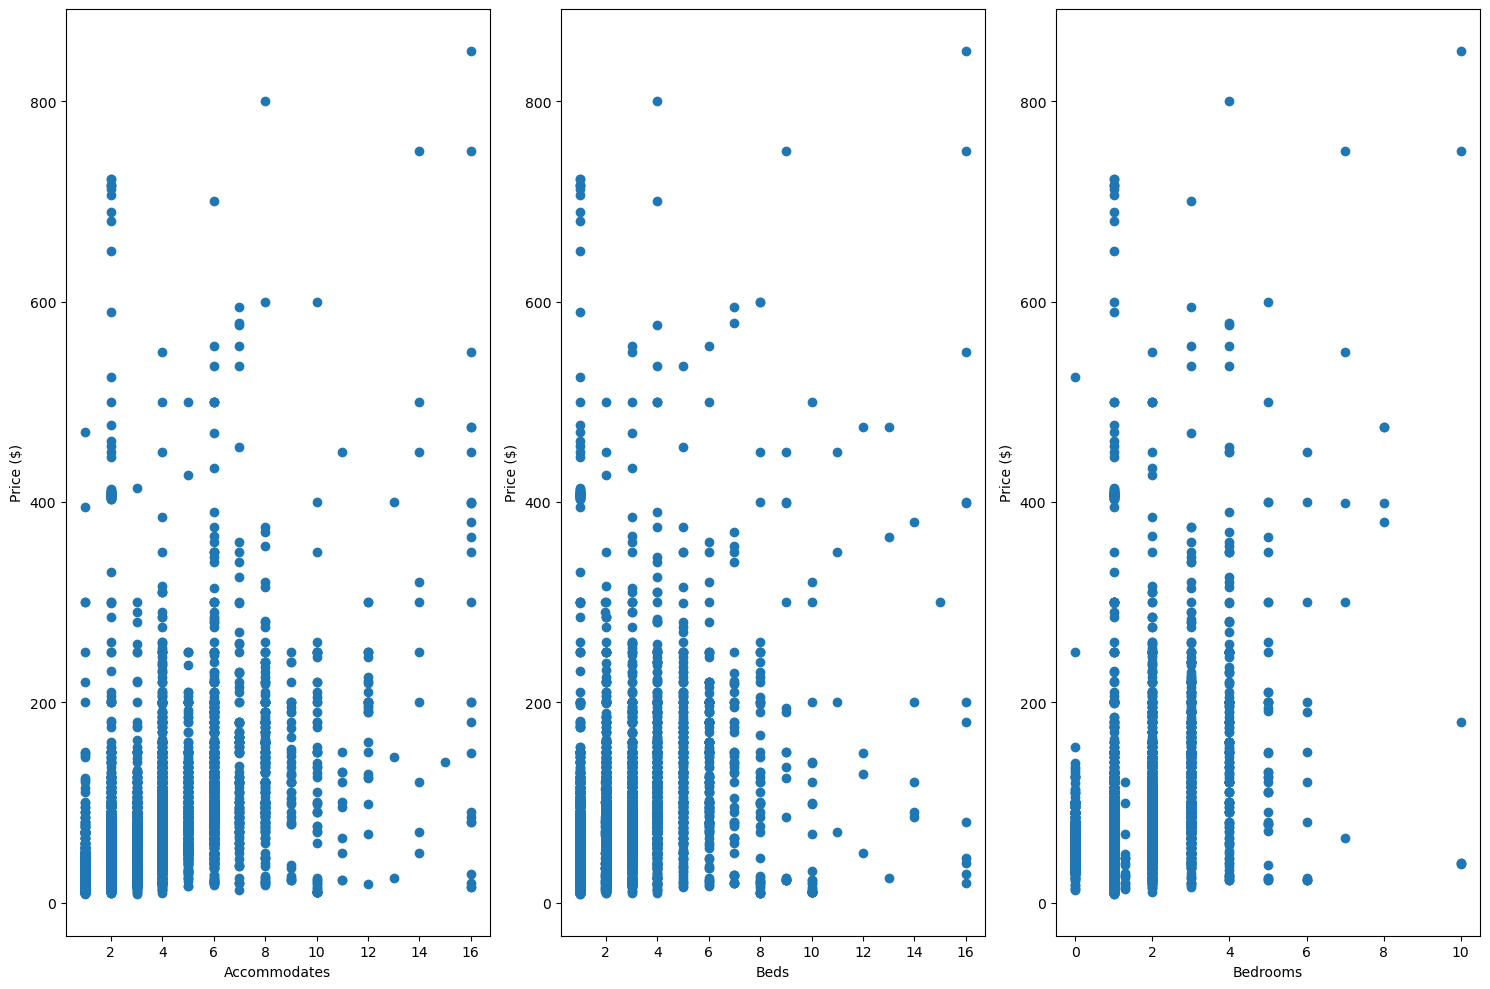

In [101]:

fig, axes = plt.subplots(1, 3, figsize=(15, 10))  # Crear una cuadrícula de 2x2

# Primer gráfico
axes[0].scatter(df_train['Accommodates'], df_train['Price'])
axes[0].set_xlabel('Accommodates')
axes[0].set_ylabel('Price ($)')


# Segundo gráfico
axes[1].scatter(df_train['Beds'], df_train['Price'])
axes[1].set_xlabel('Beds')
axes[1].set_ylabel('Price ($)')

# Tercer gráfico
axes[2].scatter(df_train['Bedrooms'], df_train['Price'])
axes[2].set_xlabel('Bedrooms')
axes[2].set_ylabel('Price ($)')




# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()



## <span style="color: purple; font-weight: bold;"> Eliminación de outliers </span>
<span style="color: orange; "> revisaré la información para quitar outliers </span>


In [103]:
df_outl = pd.DataFrame(np.unique(df_train["Accommodates"], return_counts=True)).T
df_outl.columns=["Accommodates", "Count"]
df_outl.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Accommodates,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,15.00,16.00
Count,"1,515.00","3,852.00","1,060.00","2,407.00",508.00,812.00,127.00,198.00,42.00,67.00,11.00,29.00,3.00,10.00,1.00,25.00




<span style="color: orange; "> A partir de 9 accommodates se ve una notable baja pero después vuelve a subir la tendencia</span>


In [105]:
df_outl = pd.DataFrame(np.unique(df_train["Bathrooms"], return_counts=True)).T
df_outl.columns=["Bathrooms", "Count"]
df_outl.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Bathrooms,0.00,0.50,1.00,1.25,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,8.00
Count,54.00,44.00,"8,147.00",38.00,361.00,"1,642.00",81.00,184.00,12.00,30.00,17.00,33.00,4.00,15.00,1.00,1.00,3.00


<span style="color: orange; "> Es caso similar hay una tendencia que baja y vuelve a subir la tendencia al final </span>

In [107]:
df_outl = pd.DataFrame(np.unique(df_train["Beds"], return_counts=True)).T
df_outl.columns=["Beds", "Count"]
df_outl.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Beds,1.00,1.98,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,15.00,16.00
Count,"5,297.00",38.00,"2,896.00","1,202.00",656.00,248.00,144.00,51.00,51.00,20.00,35.00,4.00,4.00,3.00,5.00,1.00,12.00



<span style="color: orange; "> A partir de las 7 camas se ve una baja siendo menor que los demás datos </span>

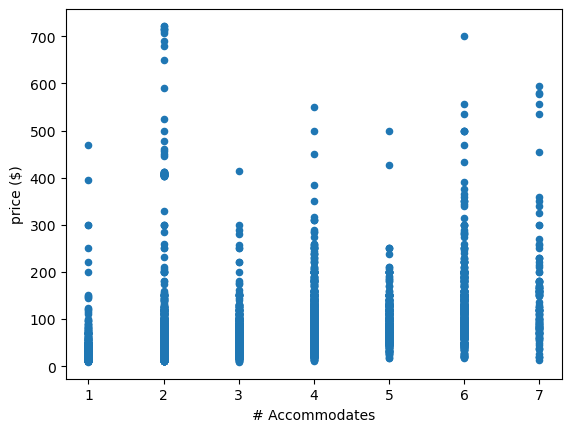

In [109]:
# Filtramos ambas particiones por el máximo
no_outliers_accommodates = df_train[df_train["Accommodates"] <= 7]
no_outliers_accommodates.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('# Accommodates')
plt.ylabel('price ($)')
plt.show()

<span style="color: green; "> Revisar la cantidad de datos perdidos </span>

In [111]:
print(
    f'Original: {df_train.shape[0]} // '
    f'Modificado: {no_outliers_accommodates.shape[0]}\nDiferencia: {df_train.shape[0] - no_outliers_accommodates.shape[0]}'
)
print(f'Variación: {(((df_train.shape[0] - no_outliers_accommodates.shape[0])/df_train.shape[0])*100):.2f}%')

Original: 10667 // Modificado: 10281
Diferencia: 386
Variación: 3.62%


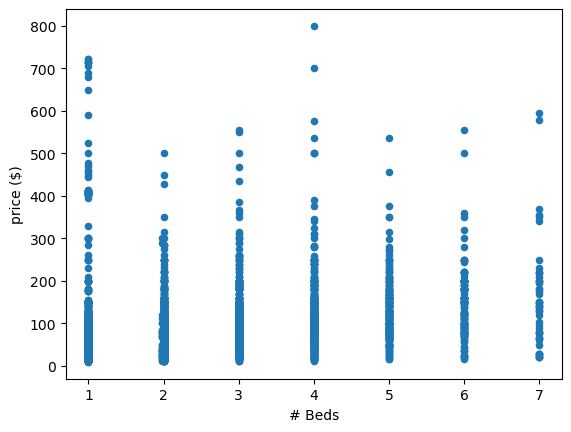

In [112]:
# Filtramos ambas particiones por el máximo
no_outliers_beds = df_train[df_train["Beds"] <= 7]
no_outliers_beds.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('# Beds')
plt.ylabel('price ($)')
plt.show()

<span style="color: green; "> Revisar la cantidad de datos perdidos </span>

In [114]:
print(
    f'Original: {df_train.shape[0]} // '
    f'Modificado: {no_outliers_beds.shape[0]}\nDiferencia: {df_train.shape[0] - no_outliers_beds.shape[0]}'
)
print(f'Variación: {(((df_train.shape[0] - no_outliers_beds.shape[0])/df_train.shape[0])*100):.2f}%')

Original: 10667 // Modificado: 10532
Diferencia: 135
Variación: 1.27%


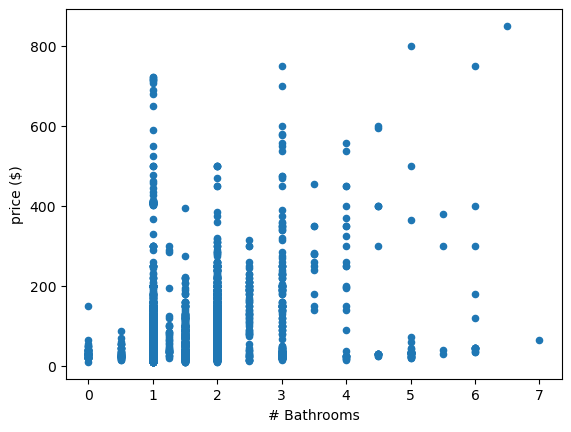

In [115]:
# Filtramos ambas particiones por el máximo
no_outliers_Bathrooms = df_train[df_train["Bathrooms"] <= 7]
no_outliers_Bathrooms.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('price ($)')
plt.show()

<span style="color: orange; "> se ve la concentración de datos entre 1 y 4 </span>

<span style="color: green; "> Revisar la cantidad de datos perdidos </span>

In [118]:
print(
    f'Original: {df_train.shape[0]} // '
    f'Modificado: {no_outliers_Bathrooms.shape[0]}\nDiferencia: {df_train.shape[0] - no_outliers_Bathrooms.shape[0]}'
)
print(f'Variación: {(((df_train.shape[0] - no_outliers_Bathrooms.shape[0])/df_train.shape[0])*100):.2f}%')

Original: 10667 // Modificado: 10664
Diferencia: 3
Variación: 0.03%


In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10667 entries, 0 to 10666
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Total Listings Count       10667 non-null  float64
 1   Street                          10667 non-null  float64
 2   Neighbourhood Cleansed          10667 non-null  float64
 3   Property Type                   10667 non-null  float64
 4   Room Type                       10667 non-null  float64
 5   Accommodates                    10667 non-null  float64
 6   Bathrooms                       10667 non-null  float64
 7   Bedrooms                        10667 non-null  float64
 8   Beds                            10667 non-null  float64
 9   Bed Type                        10667 non-null  float64
 10  Price                           10667 non-null  float64
 11  Cleaning Fee                    10667 non-null  float64
 12  Guests Included                 

## <span style="color: yellow; "> Hola Profesor, llegué hasta modelado,hice varios intentos por salir de este tema pero no pude las celdas que están es de lo que había intentado hacer pero no me salió </span>

## <span style="color: purple; font-weight: bold;"> Modelado de datos </span>
<span style="color: green; "> carga de datos </span>

In [185]:
# Filtrado:
df_train_filter = df_train.drop(['Accommodates','Bathrooms','Bedrooms','Beds','Cleaning Fee','Guests Included','Review Scores Rating','Review Scores Accuracy'], axis=1)
df_test_filter = df_test.drop(['Accommodates','Bathrooms','Bedrooms','Beds','Cleaning Fee','Guests Included','Review Scores Rating','Review Scores Accuracy'], axis=1)

# Separación del target en train y test y escalado según train.
# Para Train:
Xf = df_train_filter.drop("Price", axis=1)
feature_names_f = Xf.columns
Xf_train = Xf.values
yf_train = df_train_filter["Price"].values

scalerf = preprocessing.StandardScaler().fit(Xf_train)
XftrainScaled = scalerf.transform(Xf_train)

# Para Test:
Xf_test = df_test_filter.drop("Price", axis=1)
Xf_test = Xf_test.values
yf_test = df_test_filter["Price"].values
   
XftestScaled = scalerf.transform(Xf_test)

ValueError: X has 20 features, but StandardScaler is expecting 18 features as input.

In [189]:
def pipeline(df):
    df = df.drop(['Host Response Rate'], axis=1)
    df = df.drop(['Market'], axis=1)

    df = df.drop(df[df['Accommodates'] <= 7].index)
    df = df.drop(df[df['Beds'] <= 7].index)
    df = df.drop(df[df['Bathrooms'] <= 7].index)
    
    return df

<span style="color: green; "> Preparar datos para sklearn </span>

In [ ]:
# Separar el target en train y test y escalado de acuerdo a train.


Xf = df_filtered.drop("Price", axis=1)
feature_names_f = Xf.columns
Xf_train = Xf.values
yf_train = df_filtered["Price"].values

scalerf = preprocessing.StandardScaler().fit(Xf_train)
XftrainScaled = scalerf.transform(Xf_train)


Xf_test = df_test_filtered.drop("Price", axis=1)
Xf_test = Xf_test.values
yf_test = df_test_filtered["Price"].values
   
XftestScaled = scalerf.transform(Xf_test)

In [211]:
y_train = df_train['Price'].values
X_train = df_train.drop(['Price'], axis=1).values
feature_names = df_train.drop(['Price'], axis=1).columns

In [213]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')
df_test = pipeline(df_test)
y_test = df_test['Price'].values
X_test = df_test.drop(['Price'], axis=1).values


In [215]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)

ValueError: Found array with 0 sample(s) (shape=(0, 26)) while a minimum of 1 is required by StandardScaler.

<span style="color: green; "> Regresión polinómica </span>

In [ ]:
model = make_pipeline(PolynomialFeatures(), LinearRegression())
degrees = [1, 2, 3, 4]
param_grid = {'polynomialfeatures__degree': degrees}
grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error',verbose=2)
grid.fit(X_train_Scaled, y_train)
print("Mejores parámetros:", grid.best_params_)
print("Mejor score:", grid.best_score_)

scores = np.array(grid.cv_results_['mean_test_score'])
sns.lineplot(x=degrees,y=scores,marker="o",linewidth=2)
plt.xlabel("Degree")
plt.show()

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=3; total time=  12.5s
[CV] END .......................polynomialfeature

<span style="color: green; "> Aplicar a test </span>

In [214]:
# Carga de datos
data_test = pd.read_csv('./test.csv', sep=';', decimal='.')

#eliminación de columnas
erase_columns5= ['Host Response Rate','Market']
#quitar outliers
no_outliers_accommodates_datatest = data_test[data_test["Accommodates"] <= 7]
no_outliers_beds_datatest = data_test[data_test["Beds"] <= 7]
no_outliers_Bathrooms_datatest= data_test[data_test["Bathrooms"] <= 7]

<span style="color: green; "> Preparar datos para sklearn </span>

In [218]:
# Dataset de train
data_train = data_md.values
y_train = data_train[:,0:1]     
X_train = data_train[:,1:]    

# Dataset de test
data_test_md = data_test.values
y_test = data_test[:,0:1]     
X_test = data_test[:,1:]      

InvalidIndexError: (slice(None, None, None), slice(0, 1, None))